
# Final Project Submission

Please fill out:
* Student name: Maureen Awino Oketch
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Faith Korir
* Blog post URL:

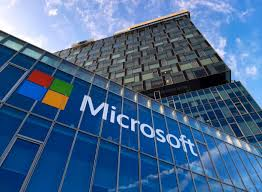


## Business Overview

Due to the increased production of original films by major companies,Microsoft wants to venture into this film industry and would like to create a new movie studio but before they get started, they have tasked me to evaluate the film industry and give them recommendations to enable them  make a decision. My recommendations are based on return on investment as a metric measure of profitability of  different movie genres both in the local and global markets, looked into most popular publisher and rating,the popularity and profitabilty  of the different kinds genres

## Business Understanding
The business understanding in this scenario involves Microsoft recognizing the opportunity to enter the film industry, specifically by establishing a new movie studio. This decision is driven by the observation that many successful companies like Netflix and Amazon are creating original video content, and Microsoft wants to leverage its resources and brand to tap into this lucrative market.




## Business  Objectives

The main business objectives is to find out if venturing into the film industry is a viable business idea for Microsft. We  need to find out what kind of genres  they need to create to muximise on profitabity, the current market trend and generally how to set themselves apart in order to be the market leaders in this industry.








## __Data Understanding__

For this project, we will be analyzing data from three movie websites: IMDB(Internet Movie Database), Box Office Mojo, The Numbers. Let's load and explore the datasets below.

## __Load Libraries and packages__

In [1]:
# importing necessary packages that we will need throughout this project
import csv
import pandas as pd
# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. This first dataset which is the bom.movie_gross.csv

In [2]:
# load in the first dataset
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


### The DataFrame 'movie_gorss' contains 3387 rows and 5 columns with the following information about movies:

1.__title__: the title of the movie

2.__studio__: the studio that produced the movie

3.__domestic_gross__ : the domestic gross revenue of the movie in dollars

4.__foreign_gross__ : the foreign gross revenue of the movie in dollars

5.__year__: the year in which the movie was released

In [3]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### from above infomation 
1.we can see the title and studio and foreign_gross have object data types. 

2.domestic_gross contains float while year contains interger data types.

3.studio has 5 missing data, domestic_gross has 28 missing data while forign gross has 1350 missing data. (i will deal with this missing values in tha data cleaning stage)
 #### Note that the foreign _gross column has object data type yet this is the foreign revenue of the movies in dollars which needs to be in float. this will be dealt with in the data cleanin section as well

#### lets get the summary statistics on the domestic_gross

In [4]:
#  descriptive statistics for domestic_gross values
movie_gross['domestic_gross'].describe()


count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

1.The mean of the column is approximately 28.75 million dollars.

2.The standard deviation of the column is approximately 66.98 million dollars, indicating that the data is spread out widely.

3.The minimum value of the column is 100 dollars, meaning that there are movies in the dataset that made very little money.

4.The maximum value of the column is approximately 936.7 million dollars, indicating that there are movies in the dataset that made a lot of money domestically

#### lets get the summary statistics on the foreign_gross

In [5]:
#descriptive statistics for production budget values
movie_gross['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

__note that we are not getting the statistical analysis on the foreign_gross column because it has some data inicated as NAN__

#### From above;
1.The count of non-null values is 2037, meaning there are 1350 missing values in the column.I will deal with this in the data cleaning section.

2.The unique count of values is 1204, meaning that there are 1204 unique values in the column, which implies that some movies had multiple foreign gross values.

3.The top value in the column is '1200000', which appears 23 times, implying that there are 23 movies that made 1.2 million dollars in foreign markets.

4.The frequency (freq) shows how many times the top value appears in the column.


## 2.The second  dataset is IMDB Title basics dataset

In [6]:
movie_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
movie_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.00,NaN


#### The IMDB Title basics dataset contains 146144 rows and 6 columns. Below is a breakdown of what the columns contain:
1.__tconst__ - an alphanumeric unique identifier of the title

2.__primary_title__ – the more popular title / the title used by the filmmakers on promotional materials at the point of release

3.__original_title__- original title, in the original language

4.__start_year (YYYY)__ – represents the release year of a title. In the case of TV Series, it is the series start year

5.__runtime_minutes__ – primary runtime of the title, in minutes

6.__genres__ – includes up to three genres associated with the title

In [7]:
# More information on the dataset
movie_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Original_title, runtime_minutes and genres have some missing values but the rest of the columns have no missing values. i will deal with the missing values in the data cleaning section. Four of the columns (tconst, primary_title, original_title, genres) have object datatypes, start_year has integer values and runtime_minutes have float values.

## 3The third data set is IMDB Title Ratings dataset

In [8]:
movie_rating = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
movie_rating

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21
...,...,...,...
73851,tt9805820,8.10,25
73852,tt9844256,7.50,24
73853,tt9851050,4.70,14
73854,tt9886934,7.00,5


### IMDB title ratings dataset contains 73856 rows and 3 columns. Below is a breakdown of what the columns contain:

1.__tconst__ - alphanumeric unique identifier of the title

2.__averagerating__ – weighted average of all the individual user ratings

3.__numvotes__ - number of votes the title has received

In [9]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


From the above info, there is no missing valus in the data set. tconst column has values with object datatype, averagerating has values with float datatype, and numvotes has values with integers.

## 4  The Numbers Movie Budgets(tn.movie_budgets) dataset

In [10]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


 ### The movie_budgets dataset contains 5782 rows and 6 columns see below breakdown on the column details;
 
1.__id__- unique number identifyers for the movies

2.__release_date__ - dates when the movies were released in the theartres

3.__movie__ - names of the movies

4.__production_budget__ - the total amount of money in dollars spent in the movie production.

5.__domestic_gross__ - the gross income generated from the local market

6.___worldwide_gross__ - the gross income generated worldwide

NB Since the budget and income are in dollars, we assume they are in the USA hence the domestic_gross is generated in the USA.

In [11]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the information above, the dataset has no missing values. One column (id) is an integer, while the other five (release_date, movie, production_budget, domestic_gross, worldwide_gross )have object data types. Since we need most of the columns in integers/floats to be able to make our analysis, we will convert the columns which are object to numerical data on the data cleaning section.

# Data  Cleaning



Now that we have an idea of the kind of data we are working with, we will  proceed and  clean the datasets so as to have meaningfull data  for analysis.

## lets start with cleaning the first dataset which is the movie_gross.csv

In [12]:
# converting the  "foreign_gross' column to a float 
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'],errors='coerce')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,nan,2018
3383,Edward II (2018 re-release),FM,4800.00,nan,2018
3384,El Pacto,Sony,2500.00,nan,2018
3385,The Swan,Synergetic,2400.00,nan,2018


we are using the pd.to_numeric() method to convert the values in the foreigne_column  to numeric data type (float) and the errors='coerce' parameter specifies that if any value can't be converted, it will be set to NaN (Not a Number)

In [13]:
#regenerating descriptive statistics for production budget values will now give us the mean,count,min etc 
movie_gross['foreign_gross'].describe()

count        2032.00
mean     75057041.63
std     137529351.20
min           600.00
25%       3775000.00
50%      18900000.00
75%      75050000.00
max     960500000.00
Name: foreign_gross, dtype: float64

In [14]:
# we will now check for the missing values for the dataset movie_gross

#checking for missing values in the bom_movie_df
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

As described earlier, the studio column has 5 missing value, which we will replace with a string 'None'
the domestic_gross and forign_gross has 28 and 1355 missing data respectively whcih we ill replace with value zero to mean no revenue was collected there.

In [15]:
# replacing missing values in the "studio" column with the string "None"
movie_gross["studio"].fillna("None", inplace = True) 
# replacing missing values in the "domestic_gross" and "foreign_gross" columns with the value 0, 
movie_gross["domestic_gross"].fillna(0, inplace = True)
movie_gross["foreign_gross"].fillna(0, inplace = True)

movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018
3384,El Pacto,Sony,2500.00,0.00,2018
3385,The Swan,Synergetic,2400.00,0.00,2018


by filling the missing values in studio with 'None' and zero for the domestic_gross and foreign_gross witll ensure that my aanalysis is not affecetd by the  missing data.

In [16]:
#rechecking for missing values in the bom_movie
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## Lets clean The second  dataset  (IMDB Title basics dataset)

In [17]:
# we will start by checking the missing values
movie_title.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

as seen above the original_title has 21 missing values while runtime_minutes and genres has 31,739 and 5,408 missing values respectively.

first, We will drop all the missing values in the genres columns as they it won't be of use to us if we replaced them, since we need the actual gentres that were indicated in the dataset in order for us to make precise analysis

In [18]:

# Drop all the missing values in the genre column
movie_title.dropna(subset=['genres'], inplace=True)
movie_title.isnull().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

we will replace the two missing values in the original_title with primamry_title as tehy appear to be the same in both columns

In [19]:
movie_title['original_title'].fillna(movie_title['primary_title'], inplace=True)
movie_title.isnull().sum()

tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

We will replace the NaN values in the runtime_minutes column with the average runtime in the corresponding genre

In [20]:
# Calculate the average runtime for each genre
average_runtimes = movie_title.groupby('genres')['runtime_minutes'].mean()

# Replace the NaN values with the average runtime in the corresponding genre
movie_title['runtime_minutes'] = movie_title.apply(lambda row: average_runtimes[row['genres']] if pd.isnull(row['runtime_minutes']) else row['runtime_minutes'], axis=1)
movie_title.dropna(subset=['runtime_minutes'], inplace=True)
movie_title.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

#### Now let's drop any duplicates we might have in our movie_title dataset

In [21]:
movie_title.drop_duplicates(subset='primary_title', keep='first', inplace=True)
movie_title

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,97.00,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.00,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,74.66,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,93.28,Comedy


as we can see the raws have now dropped from 146144 to 131284 which means we had duplicates in primary_title column

### Now let's clean The Numbers Movie Budgets(tn.movie_budgets) dataset

In [22]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

we do not have any missing values in this dataset but Production_budget, domestic_gross, worldwide_gross columns have object datatypes values, but we want to remove the commas and dollar signs, then convert them to floats

In [23]:
# Clean up 'worldwide_gross' column
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Clean up 'domestic_gross' column
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Clean up 'production_budget' column
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


In [24]:
# Drop all the duplicates
movie_budget.drop_duplicates(subset='movie', keep='first', inplace=True)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


## Merging DataFrames to work with


Join the movie_title DataFrame with the movie_rating DataFrame and get the most popular genre

In [25]:
 #Use .merge() method to merge the two datasets
rating_merged = movie_title.merge(movie_rating, how='inner', on='tconst')
rating_merged.sort_values(by='averagerating', ascending= False )

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56487,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.00,Documentary,10.00,5
47798,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.00,Documentary,10.00,7
867,tt10378660,The Dark Knight: The Ballad of the N Word,The Dark Knight: The Ballad of the N Word,2018,129.00,"Comedy,Drama",10.00,5
9469,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.00,"Crime,Documentary",10.00,5
26063,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.00,Documentary,10.00,5
...,...,...,...,...,...,...,...,...
13441,tt1945118,In a Lonely Planet,Kodokuna wakusei,2011,94.00,Romance,1.00,433
36913,tt3717376,A Time to Speak,A Time to Speak,2014,60.00,Documentary,1.00,6
20678,tt2293038,Finding Anthony,Finding Anthony,2012,76.00,"Drama,Family,Romance",1.00,6
38331,tt3855260,Yurameku,Yurameku,2014,61.00,"Fantasy,Mystery,Romance",1.00,520


In [26]:
# Change the name of the column movie to primary_title from the movie_budget dataset
movie_budget=movie_budget.rename(columns = {'movie':'primary_title'})
movie_budget

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


# Visualization

## lets see the gross profits made in the movie production

In [27]:
# Get the Profits on the worldwide market
movie_budget['profit'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

# Use .merge() method to merge the two datasets(rating_merged and movie_budget)
budget_merged = movie_budget.merge(rating_merged, how='inner', on='primary_title')
budget_merged.sort_values(by='profit', ascending= False )

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,tt1775309,Abatâ,2011,93.00,Horror,6.10,43
29,43,"Dec 19, 1997",Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00,tt2495766,Titanic,2012,90.54,Adventure,6.20,20
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
24,34,"Jun 12, 2015",Jurassic World,215000000.00,652270625.00,1648854864.00,1433854864.00,tt0369610,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
47,67,"Apr 3, 2015",Furious 7,190000000.00,353007020.00,1518722794.00,1328722794.00,tt2820852,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,21,"Oct 26, 2018",Air Strike,65000000.00,0.00,516279.00,-64483721.00,tt4743226,Da hong zha,2018,120.00,"Action,Adventure,Drama",3.30,2536
259,79,"Nov 24, 2010",The Nutcracker in 3D,90000000.00,195459.00,20466016.00,-69533984.00,tt1041804,The Nutcracker in 3D,2010,110.00,"Action,Family,Fantasy",4.30,3119
260,80,"Dec 13, 2017",Bright,90000000.00,0.00,0.00,-90000000.00,tt5519340,Bright,2017,117.00,"Action,Crime,Fantasy",6.40,147834
125,94,"Mar 11, 2011",Mars Needs Moms,150000000.00,21392758.00,39549758.00,-110450242.00,tt1305591,Mars Needs Moms,2011,88.00,"Adventure,Animation,Family",5.40,19823


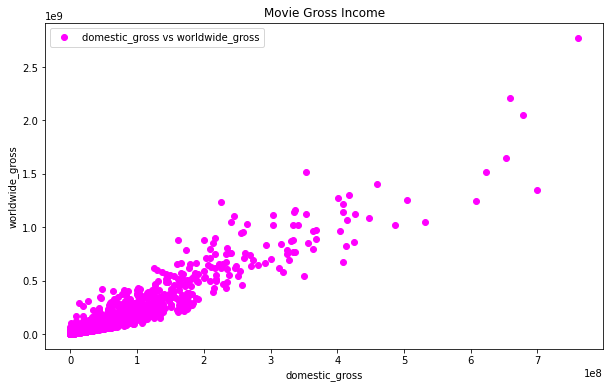

In [28]:
# Create a plot showing the corr between the domestic_gross and worldwide_gross
plt.figure(figsize=(10,6))
plt.scatter(data=budget_merged, x='domestic_gross', y='worldwide_gross', color='magenta')

plt.xlabel('domestic_gross')
plt.ylabel('worldwide_gross')
plt.title('Movie Gross Income')
plt.legend(['domestic_gross vs worldwide_gross'])
plt.show();

From the above scatterplot we can see a strong and positive correlation between the domestic and worldwide gross. There's a probability that if a movie does well in the domestic market, it will also do well in the worldwide market. This also shows that there's an importance in also focusing on the local market for the growth of the movie studio.

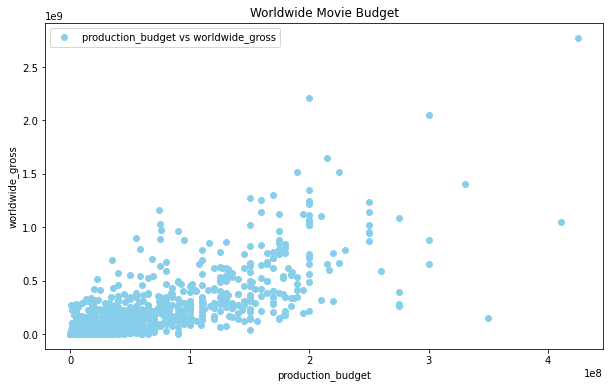

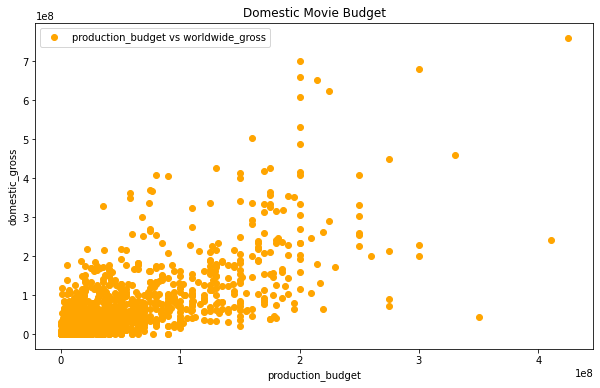

In [29]:
# Create 2 plots showing the corr between the production_budget and worldwide_gross / production_budget and domestic_gross
plt.figure(figsize=(10,6))
plt.scatter(data=budget_merged, x='production_budget', y='worldwide_gross', color='skyblue')

plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')
plt.title('Worldwide Movie Budget')
plt.legend(['production_budget vs worldwide_gross'])
plt.show();

plt.figure(figsize=(10,6))
plt.scatter(data=budget_merged, x='production_budget', y='domestic_gross', color='orange')

plt.xlabel('production_budget')
plt.ylabel('domestic_gross')
plt.title('Domestic Movie Budget')
plt.legend(['production_budget vs worldwide_gross'])
plt.show()

from above scatterplots we can see the strong positive relationship between the Produation budget abd both domestioc_gross and worlwide_gross.with some outliers noted in both plots.

There's also a probability that if some movies will do well with a bigger budget, and this might be attributed to a couple of reasons, ie. most of the budget could have been used in the marketing of the movies especially in the worldwide market, Investment in popular movie directors and actors which comes at a higher cost, some movie genre might cost higher because of the special effects.



# lets see the Top 10 movies profitable movies by assigning to teh return on investmenst (roi)

In [31]:
#Show the top 10 profitable movies 
highest_roi = budget_merged.sort_values(by='profit', ascending= False ).head(10)
highest_roi

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,profit,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00,tt1775309,Abatâ,2011,93.00,Horror,6.10,43
29,43,"Dec 19, 1997",Titanic,200000000.00,659363944.00,2208208395.00,2008208395.00,tt2495766,Titanic,2012,90.54,Adventure,6.20,20
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1748134200.00,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi",8.50,670926
24,34,"Jun 12, 2015",Jurassic World,215000000.00,652270625.00,1648854864.00,1433854864.00,tt0369610,Jurassic World,2015,124.00,"Action,Adventure,Sci-Fi",7.00,539338
47,67,"Apr 3, 2015",Furious 7,190000000.00,353007020.00,1518722794.00,1328722794.00,tt2820852,Furious Seven,2015,137.00,"Action,Crime,Thriller",7.20,335074
19,27,"May 4, 2012",The Avengers,225000000.00,623279547.00,1517935897.00,1292935897.00,tt0848228,The Avengers,2012,143.00,"Action,Adventure,Sci-Fi",8.10,1183655
28,42,"Feb 16, 2018",Black Panther,200000000.00,700059566.00,1348258224.00,1148258224.00,tt1825683,Black Panther,2018,134.00,"Action,Adventure,Sci-Fi",7.30,516148
78,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.00,417719760.00,1305772799.00,1135772799.00,tt4881806,Jurassic World: Fallen Kingdom,2018,128.00,"Action,Adventure,Sci-Fi",6.20,219125
109,56,"Nov 22, 2013",Frozen,150000000.00,400738009.00,1272469910.00,1122469910.00,tt1323045,Frozen,2010,93.00,"Adventure,Drama,Sport",6.20,62311
96,35,"Mar 17, 2017",Beauty and the Beast,160000000.00,504014165.00,1259199706.00,1099199706.00,tt2316801,La belle et la bête,2014,112.00,"Drama,Fantasy,Romance",6.40,18100


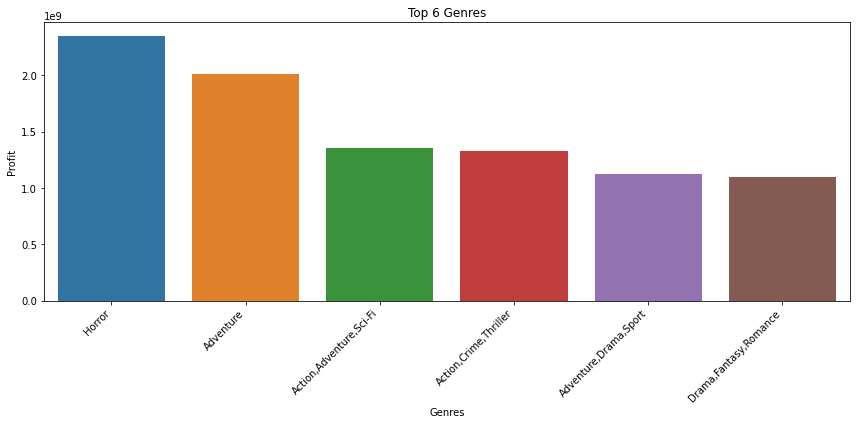

In [32]:
# Plot a barplot showing the top 6 genres making the most profits
plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'profit', data = highest_roi, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Top 6 Genres')
plt.tight_layout()
plt.show()

From the bargraph above we can see that Horror movies make the most profits followed by adventure movies. We can also see that there are certain movies that fall under more than one category and are making profit.

# Correlation between production_budget, worldwide_gross, worldwide_gross and profit

In [209]:
#the correlation btw vote_average and vote_count is weak positive correlation
budget_corr =highest_roi[['production_budget', 'worldwide_gross', 'worldwide_gross', 'profit']].corr()
budget_corr

,production_budget,worldwide_gross,worldwide_gross,profit
production_budget,1.00,0.88,0.88,0.83
worldwide_gross,0.88,1.00,1.00,1.00
worldwide_gross,0.88,1.00,1.00,1.00
profit,0.83,1.00,1.00,1.00


# create a seaborn graph to show the Correlation between production_budget, worldwide_gross, worldwide_gross and profit
plt.figure(figsize = (12,5))
sns.heatmap(budget_corr, cmap ='vlag', annot =True);

# lets find the Top Genres

In [210]:
# Get the top 10 with the most value counts
unique_genres = budget_merged['genres'].value_counts().reset_index()
unique_genres.columns = ['genres', 'genres_count']
top_10_genres = unique_genres.head(10)
top_10_genres

,genres,genres_count
0,Drama,141
1,Comedy,76
2,"Comedy,Drama",70
3,"Adventure,Animation,Comedy",68
4,"Comedy,Drama,Romance",64
5,Documentary,61
6,"Action,Adventure,Sci-Fi",55
7,"Drama,Romance",54
8,"Action,Crime,Drama",46
9,"Comedy,Romance",45


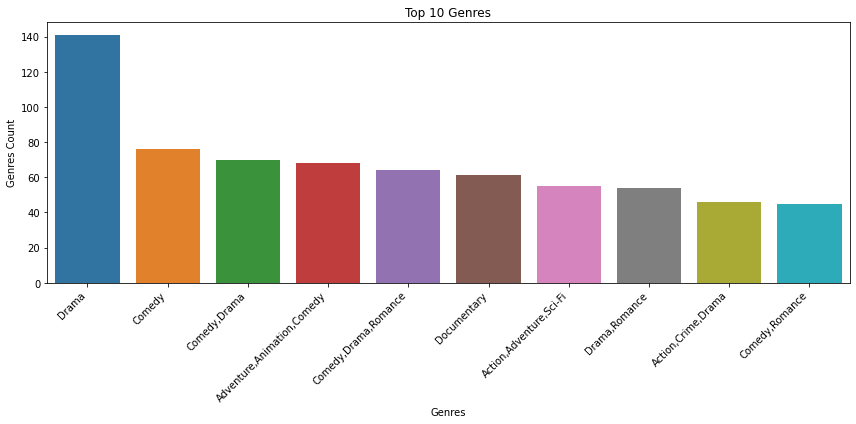

In [211]:
# Plot a bar showing the top 10 genres with the most value counts

plt.figure(figsize = (12, 6))
sns.barplot(x = 'genres', y = 'genres_count', data = top_10_genres, ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Genres Count')
plt.title('Top 10 Genres')
plt.tight_layout()
plt.show()

from above bargraph, we can see the that the drama is the most popularly created  genre followed by comedy.From the previous bar graph  we saw  horor beign the most profitable followed by adventure  but drama and comedy are the most created genres.this may be due to law production cost,less  casting time and online streaming shows like youtube might be airing this kind of movies due to high demand.

# Find the correlation between the average rating and the number of votes

In [212]:
#the correlation btw vote_average and vote_count is weak positive correlation
rating_corr =highest_roi[['averagerating', 'numvotes']].corr()
rating_corr

,averagerating,numvotes
averagerating,1.00,0.87
numvotes,0.87,1.00


<AxesSubplot:>

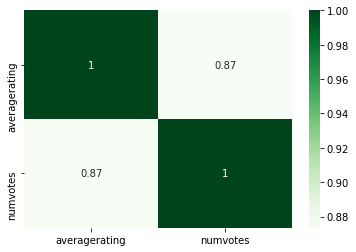

In [213]:
# create a heatmap to show the correlation of the average rating and the number of vote
sns.heatmap(rating_corr, cmap ='Greens', annot =True)

From the heatmap above we can see that there is a positive correlation between the average rating and the number of votes. We can predict that the higher the rating the higher the number of votes for  movie.

# Runtime minutes for the top 10 profitabel movies

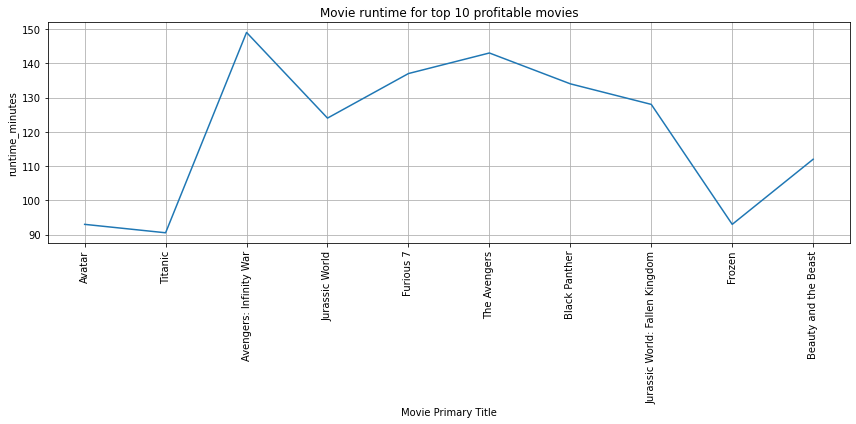

In [214]:
# Plot a lineplot showing Movie runtime for the top 10 profitable movies
plt.figure(figsize=(12, 6))
sns.lineplot(data=highest_roi, x="primary_title", y= "runtime_minutes")
plt.xlabel("Movie Primary Title")
plt.ylabel("runtime_minutes")
plt.title("Movie runtime for top 10 profitable movies")
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()


from above line grapgh we can see the most profitable movie Avatar run below 95 minutes. avengers was the highest at 150 ninutes while titanic was the lowest at 90 minute. therefore we can conclude that profitable movies should last between 90 to 150 minutes.

In [215]:
#lets find out the top ten  most popular studios 
top_ten_studio = movie_gross['studio'].value_counts().head(10)
top_ten_studio

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

IFC is the most popula studios studio as per above. we should also consider atleast studios tht are in top ten in the film industries for high quality  production.

# Conclusion

Below are my findings from my analysis above;

  1.The production budget plays a major role for  profitabity in the film industries  . this may be attributed to major factors like  maketing marketing cost, investing in popular movie actors and directors  which come at a higher cost, language intepretation of the original film etc.
  
  2.Horror movies are the most profitable in the film industry  but we have noted that movies that falls under more than one genre are more profitable too.
  
  3.Popularity of a film doesn't guarantee the profitability of the film. From our analysis, there are some genres that were very popular in terms of vote counts but the profitability was slightly lower.
  
  4. We also noted that astrong positive correlation between domestic_gross and worldwide_gross. this means that is a movie dose well in the local market, it will also perform well in the international market.
  

# Recomendations 

1.Consider good budget allocation for film production as we have noted that there is strong positive correlation between production budget and both domestic_gross and worlwide_gross as this will enable you have good marketers, best producers and also renown movie actors which will make the film production a succes and popular hence more profitabilty.
  
2.Divesify the genres to maximise profitability.In as much as horror movies are the most profitable, we have seen other film that have a mixture of different genres being proftable too.
  
3.The runtime minutes for films is averagely between 90 - 150 minutes, therefore if there's a probability of having a longer film, it's best to create them in series of between 90 - 150 minutes.
  
  
 4.Forcus on marketing the films in the  domestic market as this will determine the success/ profitability  of the film in the international markets.As noted in our analysis, there was a strong positive correaltinship between domestic_gross and wolrwide _gross
  
  
  5.. Consider the overall market trend and consumer preferences when making investment decisions in the movie industry. For example, if streaming services are becoming more popular, short documentary film is a good genre to focus on as they  have the potential to perform well on streaming platforms. Keeping up with the latest market trends canhelp  make informed investment decisions.
  
  
